Your solution should include:
- Image visualisation (examples).
- Outliers detection.
- Dimension reduction.
- Classification (not using neural network or deep learning).
- A pipeline of the final working solution.

In [25]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf
# from tensorflow.python.keras.layers import Conv2D, Conv2DTranspose, UpSampling2D,\
#     Dense, Layer, Reshape, InputLayer, Flatten, Input, MaxPooling2D
import plotly.express as px
from sklearn import svm

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [2]:
df = pd.read_csv('./train.csv')

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_pixel = df.drop('label', axis=1)

In [5]:
df_pixel.shape

(42000, 784)

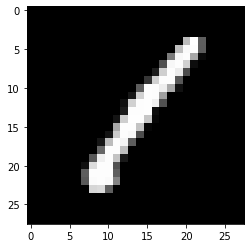

In [6]:
img = df_pixel.iloc[0].values.reshape(28, 28)
plt.imshow(img, cmap='gray')
plt.show()

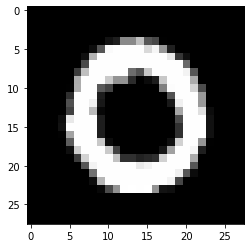

In [23]:
img = df_pixel.iloc[1].values.reshape(28, 28)
plt.imshow(img, cmap='gray')
plt.show()

In [7]:
X = df_pixel.values
y = df['label'].values

In [8]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train = X_train.reshape(-1, 28*28*1)
# X_test = X_test.reshape(-1, 28*28*1)

In [9]:
model = svm.SVC()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.973452380952381

In [10]:
# change values to binary to change to B&W images
df_pixel_bw = df_pixel.apply(lambda x: (x > 0.5).astype(int))

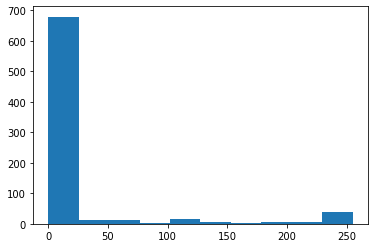

In [11]:
img = df_pixel.iloc[6]
plt.hist(img)
plt.show()

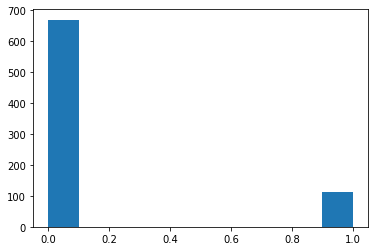

In [12]:
img = df_pixel_bw.iloc[6]
plt.hist(img)
plt.show()

In [13]:
df_pixel_bw.values.shape

(42000, 784)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df_pixel_bw.values, y, test_size=0.2, random_state=42)

In [21]:
model = svm.SVC(probability=True)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9694047619047619

In [22]:
from sklearn.metrics import confusion_matrix

y_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[807   0   0   1   2   1   3   0   2   0]
 [  0 899   2   1   1   1   1   1   2   1]
 [  2   4 822   2   5   0   0   2   7   2]
 [  1   3   5 891   0  12   0   6  12   7]
 [  1   0   1   0 815   1   4   2   0  15]
 [  1   1   0  15   0 666   9   1   4   5]
 [  2   1   0   0   0   1 776   0   5   0]
 [  0   2   5   0   9   0   0 860   3  14]
 [  2   6   1   7   4   6   0   2 805   2]
 [  2   3   1  14   5   2   0   7   2 802]]


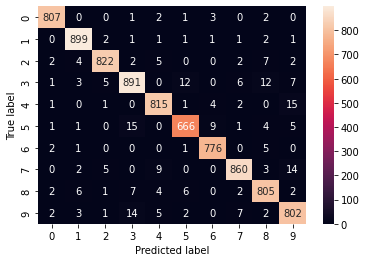

In [27]:
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [18]:
model.predict(X_test[0:50])

array([8, 1, 9, 9, 8, 6, 2, 2, 7, 1, 6, 3, 1, 2, 7, 4, 3, 3, 6, 4, 8, 5,
       2, 6, 0, 0, 0, 8, 6, 3, 6, 6, 1, 9, 8, 6, 7, 3, 6, 1, 9, 7, 9, 6,
       8, 3, 4, 2, 7, 8])

In [19]:
y_test[0:50]

array([8, 1, 9, 9, 8, 6, 2, 2, 7, 1, 6, 3, 1, 2, 7, 4, 3, 3, 6, 4, 9, 5,
       2, 6, 0, 0, 0, 8, 6, 3, 6, 6, 1, 9, 8, 6, 7, 3, 6, 1, 9, 7, 9, 6,
       8, 3, 4, 2, 7, 8])